# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler

In [2]:
# sns.get_dataset_names()

In [3]:
data('planets', show_doc=True)
df = data('planets')

planets

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Exoplanets Data

### Description

Data on planets outside the Solar System.

### Usage

    data("planets")

### Format

A data frame with 101 observations from 101 exoplanets on the following 3
variables.

mass

Jupiter mass of the planet.

period

period in earth days.

eccen

the radial eccentricity of the planet.

### Details

From the properties of the exoplanets found up to now it appears that the
theory of planetary development constructed for the planets of the Solar
System may need to be reformulated. The exoplanets are not at all like the
nine local planets that we know so well. A first step in the process of
understanding the exoplanets might be to try to classify them with respect to
their known properties.

### Source

M. Mayor and P. Frei (2003). _New Worlds in the Cosmos: The Discovery of
Exoplanets_. Cambridge University Press, Cambridge, UK.

### Examples

      data("

### Deciphering Attribute Names and Values
---
Google search for: `Jupiter mass`

What is the exact mass of Jupiter?

1.9 x 10^27 kg


The mass of Jupiter is 1.9 x 1027 kg. It is hard to fully understand a number that large, so here are a few comparisons to help. It would take 318 times Earth's mass to equal Jupiter's

<br>

I do not yet know what `days` measures __exactly__. I've spent a good amount of time searching. Will return to at another time.

<br>

Google search for: `Orbital Eccentricity`

The orbital eccentricity of an astronomical object is a dimensionless parameter that determines the amount by which its orbit around another body deviates from a perfect circle.

|value|meaning|
|:---|:---|
|0|circular orbit|
|0 < eccen < 1|elliptic orbit|
|1 |parabolic escape orbit|
|1 < eccen|hyperbola|

In [4]:
df.shape

(101, 3)

In [5]:
df.head()

,mass,period,eccen
1,0.120,4.950,0.00
2,0.197,3.971,0.00
3,0.210,44.280,0.34
4,0.220,75.800,0.28
5,0.230,6.403,0.08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 1 to 101
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mass    101 non-null    float64
 1   period  101 non-null    float64
 2   eccen   101 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


In [7]:
df.describe()

,mass,period,eccen
count,101.000000,101.000000,101.000000
mean,3.327287,666.531252,0.281548
std,3.680601,873.749838,0.210943
min,0.050000,2.985000,0.000000
25%,0.930000,44.280000,0.100000
50%,1.760000,337.110000,0.270000
75%,4.140000,1089.000000,0.410000
max,17.500000,5360.000000,0.927000


In [8]:
# unique values per attribute
df.nunique()

mass       91
period    101
eccen      64
dtype: int64

In [9]:
# No duplicate planets
df.duplicated().sum()

0

<div class="alert alert-block alert-success">
Data Preparation Notes:
    
1. [ ] Create a Categorical column with the types of orbits as `orbit_type`.
2. [ ] Scale `period` column. Tryout: `QuantileTransformer`, `MinMaxScaler`, `RobustScaler`
</div>

# All Attribute Interactions
`sns.pairplot()`
- Visually see interactions between each attribute
- See the distribution of each value attribute

`sns.heatmap()`
- Use with df/train.corr() to calculate the correlations among attributes

# `sns.pairplot()`
---
With the `planets` dataset, using `sns.pairplot()` we see:
- Distributions of each attribute
- Relationships between variables with different units of measurement: `mass` and `eccen`

Before we can formulate our hypotheses with confidence.

Planets Attributes Distributions and Interactions


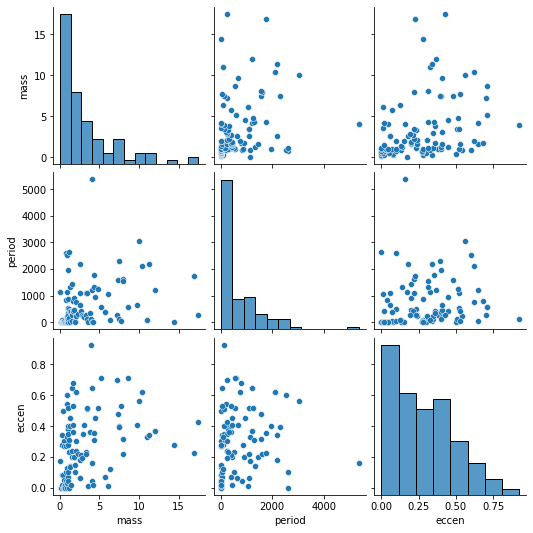

In [10]:
print("Planets Attributes Distributions and Interactions")
sns.pairplot(df);

# `sns.heatmap()`
---
Using `sns.heatmap()` shows the correlations between each attribute.
- Look at each distribution to check for the _shape_ of the distribution.
- Ensure that outliers have been noted if present.

<div class="alert alert-block alert-info">
Create new `sns.heatmap()` with <strong>scaled data</strong></div>

Planets Attribute Correlations


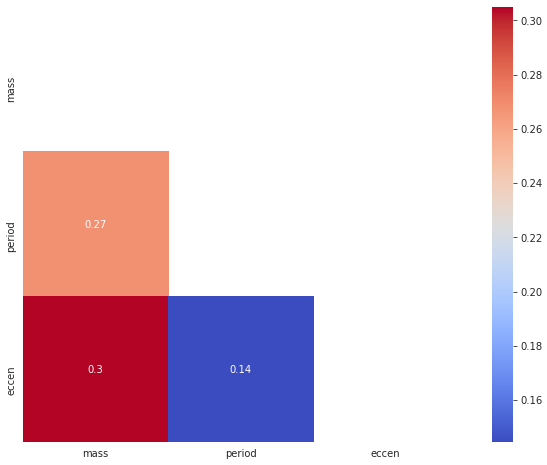

In [11]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

print("Planets Attribute Correlations")
with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(df.corr(),
                     cmap='coolwarm',
                     mask=mask,
                     square=True,
                     annot=True);

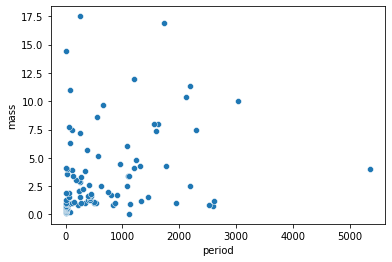

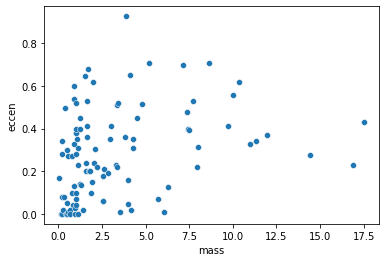

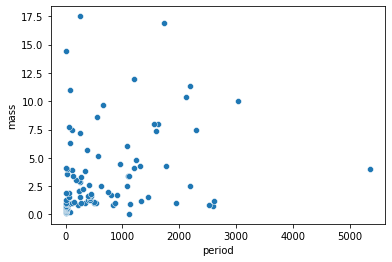

In [12]:
# Plotting continuous v. continuous data using scatter plots
# Add to workflow:
# 1. Place all continuous plots in one cell
# 2. Seperate cells with text
# 3. Summarize continuous v. countinuous plots

sns.scatterplot(x=df.period, y=df.mass, data=df)
plt.show();
sns.scatterplot(x=df.mass, y=df.eccen, data=df)
plt.show();
sns.scatterplot(x=df.period, y=df.mass, data=df)
plt.show();

<div class="alert alert-block alert-success">
Data Preparation Notes:
    
1. [ ] Create a Categorical column with the types of orbits as `is_elliptic`.
    
Data Modeling Notes:
    
1. [ ] Scale `period` column. Tryout: `QuantileTransformer`, `MinMaxScaler`, `RobustScaler`
    
    
2. [ ] Scale `mass` column. Tryout: `QuantileTransformer`, `MinMaxScaler`, `RobustScaler`
    
    
Experimental
- [ ] Create a new column for period called `years`
- [ ] Rename column as `days`

</div>

In [13]:
# I questioned making this column
df['is_elliptic'] = np.where(df.eccen != 0, 1, 0)

In [14]:
df.head()

,mass,period,eccen,is_elliptic
1,0.120,4.950,0.00,0
2,0.197,3.971,0.00,0
3,0.210,44.280,0.34,1
4,0.220,75.800,0.28,1
5,0.230,6.403,0.08,1


<div class="alert alert-block alert-success">
Data Preparation Notes:
    
1. [x] Create a Categorical column with the types of orbits as `is_elliptic`.
</div>

In [15]:
train, test = train_test_split(df, test_size =.2, random_state=369)

In [16]:
print(train.shape)
print(test.shape)

(80, 4)
(21, 4)


##  Scale the Data

### `QuantileTransformer()`


In [17]:
qscaler = QuantileTransformer()

In [18]:
q_train = qscaler.fit_transform(train)
q_test = qscaler.transform(test)

scaled_train = pd.DataFrame(q_train,
                           columns=train.columns.values
                           ).set_index([train.index.values])

scaled_test = pd.DataFrame(q_test,
                          columns=test.columns.values
                          ).set_index([test.index.values])

# QuantileTransformer warnings due to small sample sizes: small train and test sets.
# Default for parameter is 1_000.

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (80). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [19]:
scaled_train.head()

,mass,period,eccen,is_elliptic
37,0.367089,0.974684,0.000000,0.0
41,0.417722,0.151899,0.316456,1.0
4,0.012658,0.329114,0.550633,1.0
55,0.569620,0.443038,0.487342,1.0
13,0.113924,0.037975,0.069620,1.0


Planets Attributes Distributions and Interactions


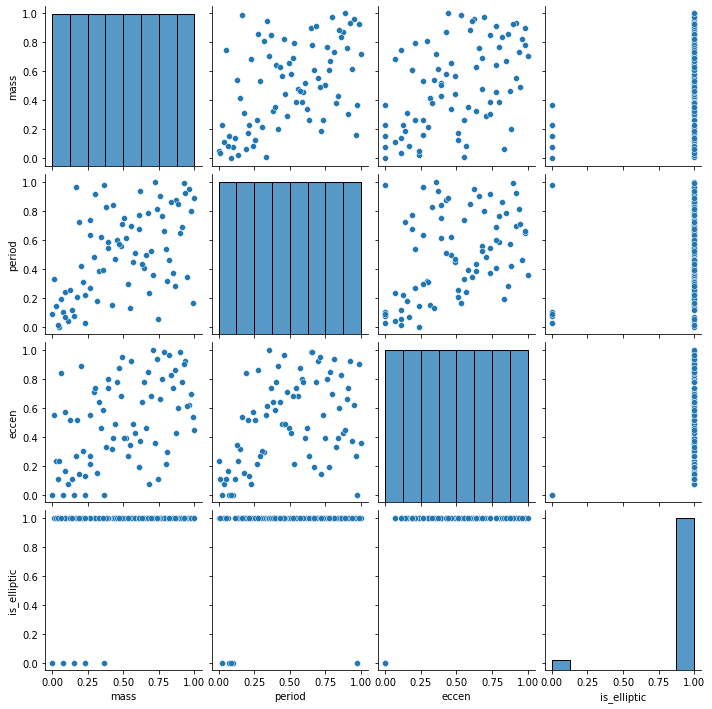

In [20]:
print("Planets Attributes Distributions and Interactions")
sns.pairplot(scaled_train);

Planets Attribute Correlations


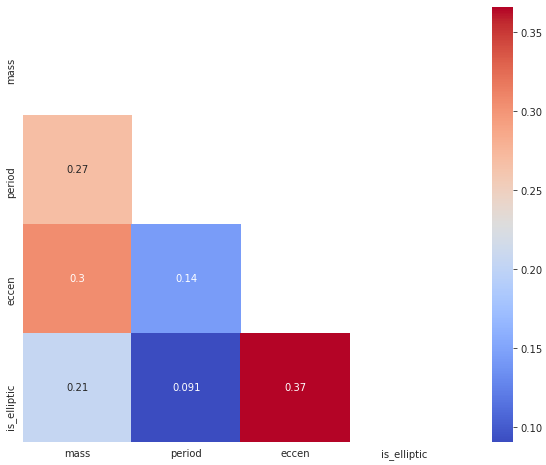

In [21]:
mask = np.zeros_like(scaled_train.corr())
mask[np.triu_indices_from(mask)] = True

print("Planets Attribute Correlations")
with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(df.corr(),
                     cmap='coolwarm',
                     mask=mask,
                     square=True,
                     annot=True);

`is_elliptic` is _highly correlated_ `eccen`with  because it was derived from `eccen`!

Analyzing and comparing the correlations of the new row with the old rows, I don't see any valuable insights by having the column.
> There are only 7 planets with a circular orbit, 94 planets with an elliptical orbit.

### `MinMaxScaler()`

In [22]:
mmscaler = MinMaxScaler()

In [23]:
mm_train = pd.DataFrame(mmscaler.fit_transform(train[['mass', 'period']]),
                        columns=['mass_scaled', 'mass_period']
                       ).set_index(train.index.values)

mm_test = pd.DataFrame(mmscaler.transform(test[['mass', 'period']]),
                       columns=['mass_scaled', 'mass_period']
                      ).set_index(test.index.values)

mm_train = pd.concat([train, mm_train], axis=1)
mm_test = pd.concat([test, mm_test], axis=1)

In [24]:
mm_train.head()

,mass,period,eccen,is_elliptic,mass_scaled,mass_period
37,1.150,2614.0000,0.000,0,0.057056,0.487401
41,1.282,7.1262,0.134,1,0.064958,0.000773
4,0.220,75.8000,0.280,1,0.001377,0.013592
55,2.050,241.3000,0.240,1,0.110938,0.044487
13,0.540,3.0970,0.010,1,0.020535,0.000021


In [25]:
mm_test.head()

,mass,period,eccen,is_elliptic,mass_scaled,mass_period
42,1.42,426.00,0.020,1,0.073220,0.078965
57,2.08,228.52,0.304,1,0.112734,0.042101
88,7.50,2300.00,0.395,1,0.437227,0.428786
73,4.00,15.78,0.046,1,0.227684,0.002388
83,6.08,1074.00,0.011,1,0.352212,0.199928


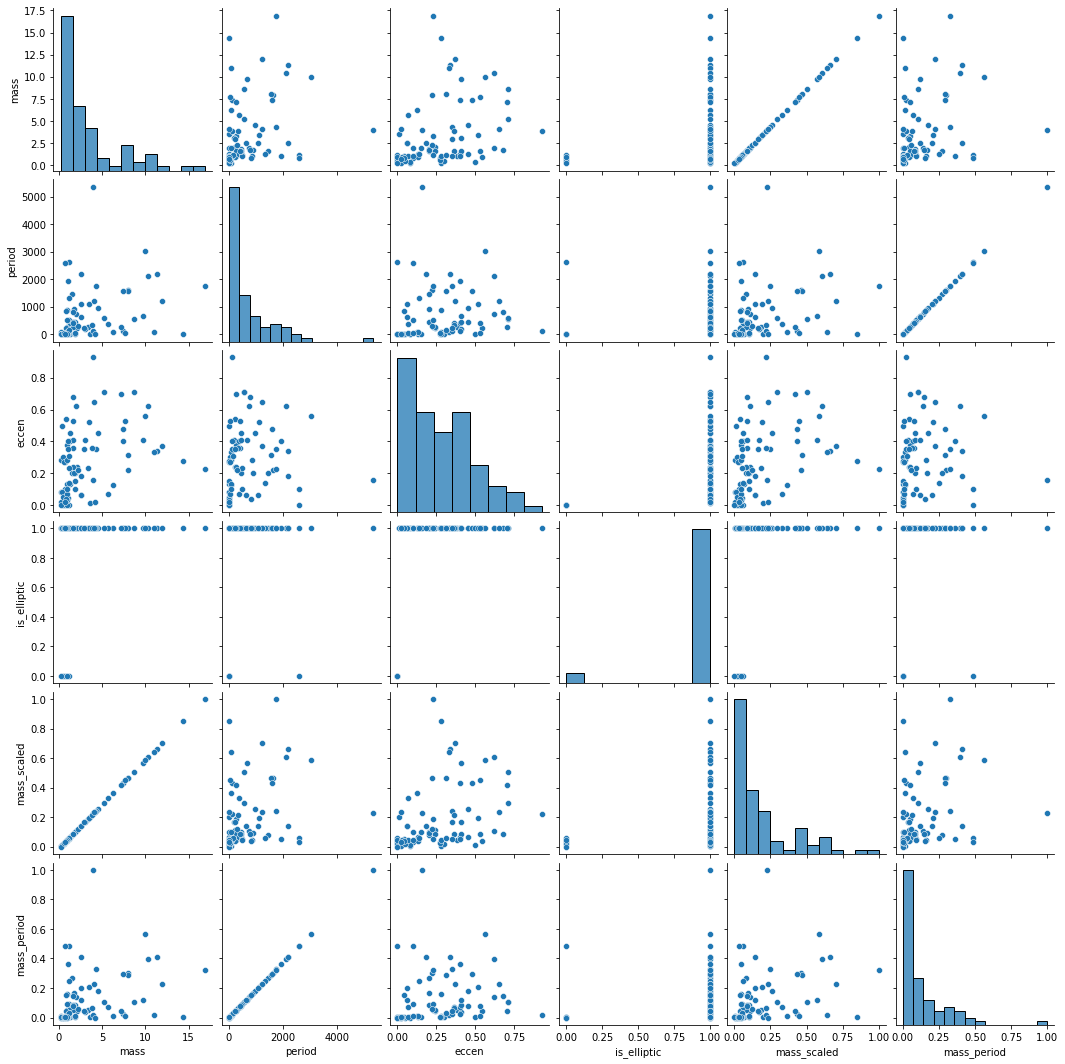

In [26]:
sns.pairplot(mm_train);

###  `RobustScaler()`

In [27]:
rbscaler = RobustScaler()

In [28]:
rb_train = pd.DataFrame(rbscaler.fit_transform(train[['mass', 'period']]),
                        columns=['mass_scaled', 'mass_period']
                       ).set_index(train.index.values)

rb_test = pd.DataFrame(rbscaler.transform(test[['mass', 'period']]),
                       columns=['mass_scaled', 'mass_period']
                      ).set_index([test.index.values])

rb_train = pd.concat([train, rb_train], axis=1)
rb_test = pd.concat([test, rb_test], axis=1)

In [29]:
rb_train.head()

,mass,period,eccen,is_elliptic,mass_scaled,mass_period
37,1.150,2614.0000,0.000,0,-0.178264,2.621246
41,1.282,7.1262,0.134,1,-0.136982,-0.318106
4,0.220,75.8000,0.280,1,-0.469116,-0.240673
55,2.050,241.3000,0.240,1,0.103206,-0.054065
13,0.540,3.0970,0.010,1,-0.369038,-0.322649


In [30]:
rb_train.describe()

,mass,period,eccen,is_elliptic,mass_scaled,mass_period
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3.375575,660.284459,0.278579,0.937500,0.517772,0.418356
std,3.652899,911.253319,0.213821,0.243589,1.142423,1.027473
min,0.197000,2.985000,0.000000,0.000000,-0.476310,-0.322775
25%,0.975000,28.112500,0.095000,1.000000,-0.232995,-0.294443
50%,1.720000,289.250000,0.255000,1.000000,0.000000,0.000000
75%,4.172500,915.000000,0.402500,1.000000,0.767005,0.705557
max,16.900000,5360.000000,0.927000,1.000000,4.747459,5.717467


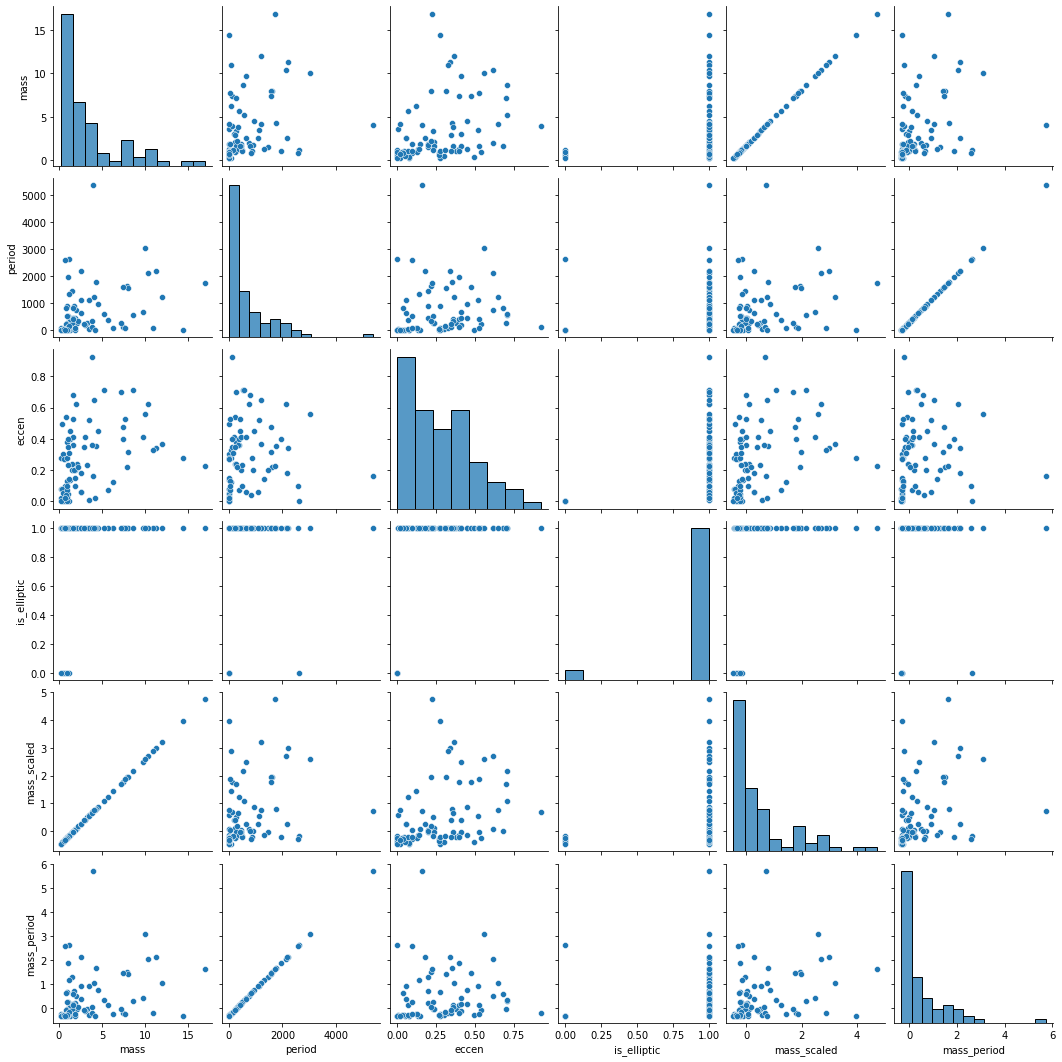

In [31]:
sns.pairplot(rb_train);

<div class="alert alert-block alert-success">
    
Data Modeling Notes:
    
1. [x] Scale `period` column. Tryout: `QuantileTransformer`, `MinMaxScaler`, `RobustScaler`
    
    
2. [x] Scale `mass` column. Tryout: `QuantileTransformer`, `MinMaxScaler`, `RobustScaler` 
    
Experimental
- [ ] Create a new column for period called `years`
- [ ] Rename column as `days`

</div>

# SCALING THE DATA DOES NOT CHANGE THE DISTRIBUTIONS ONLY THE UNITS!
<br>
<br>
<br>
<br>
<br>

# Exploration Exercises
---

In [42]:
from wrangle import wrangle_telco

In [44]:
df = pd.read_csv('two_year_contracts.csv')
df = wrangle_telco()

1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

In [45]:
df.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.80
2,0016-QLJIS,65,90.45,5957.90
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


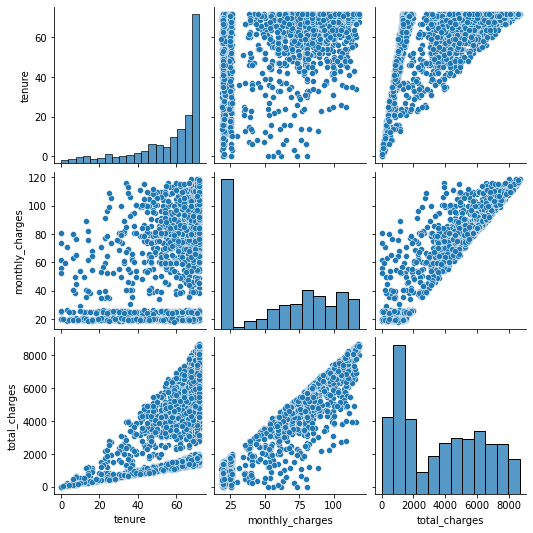

In [55]:
sns.pairplot(data=df);

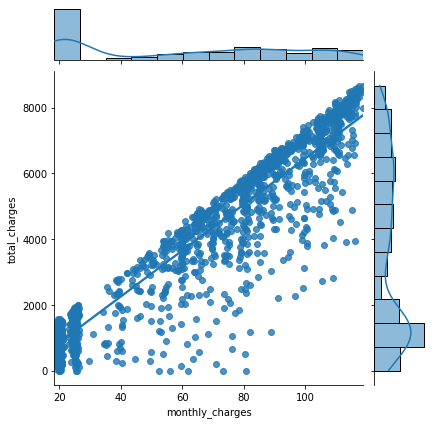

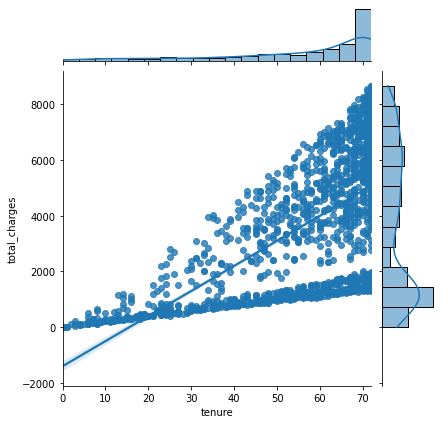

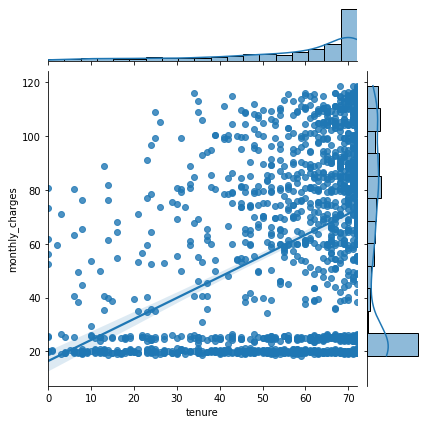

In [53]:
sns.jointplot(x=df.monthly_charges,
              y=df.total_charges,
              data=df,
              kind='reg'
             )
plt.show()

sns.jointplot(x=df.tenure,
              y=df.total_charges,
              data=df,
              kind='reg'
             )
plt.show()

sns.jointplot(x=df.tenure,
              y=df.monthly_charges,
              data=df,
              kind='reg'
             )
plt.show();

2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

3. Write a function, plot_categorical_and_continuous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.